# Model Volatility with ARCH and GARCH for Time Series Forecasting in Python

A change in the variance or volatility over time can cause problems when modeling time series with classical methods like ARIMA.

The ARCH or Autoregressive Conditional Heteroskedasticity method provides a way to model a change in variance in a time series that is time dependent, such as increasing or decreasing volatility. An extension of this approach named GARCH or Generalized Autoregressive Conditional Heteroskedasticity allows the method to support changes in the time dependent volatility, such as increasing and decreasing volatility in the same series.

In this tutorial, you will discover the ARCH and GARCH models for predicting the variance of a time series.

After completing this tutorial, you will know:

The problem with variance in a time series and the need for ARCH and GARCH models.
How to configure ARCH and GARCH models.
How to implement ARCH and GARCH models in Python.

This tutorial is divided into five parts; they are:

Problem with Variance:

1. What Is an ARCH Model?
2. What Is a GARCH Model?
3. How to Configure ARCH and GARCH Models
4. ARCH and GARCH Models in Python

## Problem with Variance

Autoregressive models can be developed for univariate time series data that is stationary (AR), has a trend (ARIMA), and has a seasonal component (SARIMA).

One aspect of a univariate time series that these autoregressive models do not model is a change in the variance over time.

Classically, a time series with modest changes in variance can sometimes be adjusted using a power transform, such as by taking [the Log or using a Box-Cox transform](https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/).

There are some time series where the variance changes consistently over time. In the context of a time series in the financial domain, this would be called increasing and decreasing volatility.

In time series where the variance is increasing in a systematic way, such as an increasing trend, this property of the series is called heteroskedasticity. It’s a fancy word from statistics that means changing or unequal variance across the series.

If the change in variance can be correlated over time, then it can be modeled using an autoregressive process, such as ARCH.

## AutoRegressive Conditional Heteroskedasticity (ARCH)

Autoregressive Conditional Heteroskedasticity, or ARCH, is a method that explicitly models the change in variance over time in a time series.

Specifically, an ARCH method models the variance at a time step as a function of the residual errors from a mean process (e.g. a zero mean).

> The ARCH process introduced by Engle (1982) explicitly recognizes the difference between the unconditional and the conditional variance allowing the latter to change over time as a function of past errors.

A lag parameter must be specified to define the number of prior residual errors to include in the model. Using the notation of the GARCH model (discussed later), we can refer to this parameter as “q“. Originally, this parameter was called “p“, and is also called “p” in the arch Python package used later in this tutorial.

- q: The number of lag squared residual errors to include in the ARCH model.

A generally accepted notation for an ARCH model is to specify the ARCH() function with the q parameter ARCH(q); for example, ARCH(1) would be a first order ARCH model.

### Stationarity

The approach expects the series is stationary, other than the change in variance, meaning it does not have a trend or seasonal component. An ARCH model is used to predict the variance at future time steps.

> [ARCH] are mean zero, serially uncorrelated processes with nonconstant variances conditional on the past, but constant unconditional variances. For such processes, the recent past gives information about the one-period forecast variance.

In practice, this can be used to model the expected variance on the residuals after another autoregressive model has been used, such as an ARMA or similar.

> The model should only be applied to a prewhitened residual series {e_t} that is uncorrelated and contains no trends or seasonal changes, such as might be obtained after fitting a satisfactory SARIMA model.

## Generalized AutoRegressive Conditional Heteroskedasticity (GARCH)

Generalized Autoregressive Conditional Heteroskedasticity, or GARCH, is an extension of the ARCH model that incorporates a moving average component together with the autoregressive component.

Specifically, the model includes lag variance terms (e.g. the observations if modeling the white noise residual errors of another process), together with lag residual errors from a mean process.

The introduction of a moving average component allows the model to both model the conditional change in variance over time as well as changes in the time-dependent variance. Examples include conditional increases and decreases in variance.

As such, the model introduces a new parameter “p” that describes the number of lag variance terms:

- p: The number of lag variances to include in the GARCH model.
- q: The number of lag residual errors to include in the GARCH model.


### ARCH / GARCH

A generally accepted notation for a GARCH model is to specify the GARCH() function with the p and q parameters GARCH(p, q); for example GARCH(1, 1) would be a first order GARCH model.

A GARCH model subsumes ARCH models, where a GARCH(0, q) is equivalent to an ARCH(q) model.

> For p = 0 the process reduces to the ARCH(q) process, and for p = q = 0 E(t) is simply white noise. In the ARCH(q) process the conditional variance is specified as a linear function of past sample variances only, whereas the GARCH(p, q) process allows lagged conditional variances to enter as well. This corresponds to some sort of adaptive learning mechanism.

As with ARCH, GARCH predicts the future variance and expects that the series is stationary, other than the change in variance, meaning it does not have a trend or seasonal component.

### Configuration

The configuration for an ARCH model is best understood in the context of ACF and PACF plots of the variance of the time series.

This can be achieved by subtracting the mean from each observation in the series and squaring the result, or just squaring the observation if you’re already working with white noise residuals from another model.

> If a correlogram appears to be white noise […], then volatility ca be detected by looking at the correlogram of the squared values since the squared values are equivalent to the variance (provided the series is adjusted to have a mean of zero).

The ACF and PACF plots can then be interpreted to estimate values for p and q, in a similar way as is done for the ARMA model.

#### ARCH and GARCH Models in Python

In this section, we will look at how we can develop ARCH and GARCH models in Python using the [arch](https://github.com/bashtage/arch) library.

### Test Dataset

We can create a dataset with a controlled model of variance.

The simplest case would be a series of random noise where the mean is zero and the variance starts at 0.0 and steadily increases.

We can achieve this in Python using the `gauss()` function that generates a Gaussian random number with the specified mean and standard deviation.

In [30]:
from random import gauss
from random import seed
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from arch import arch_model

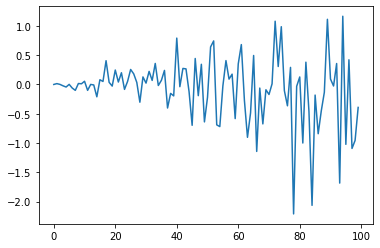

In [5]:
# create a simple white noise with increasing variance

# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# plot
pyplot.plot(data)
pyplot.show()

### ACF and PACF

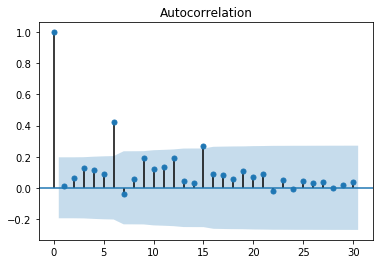

In [28]:
# square the dataset (squared of the error)
squared_data = [x**2 for x in data]
# create acf plot
plot_acf(squared_data, lags=30)
pyplot.show()

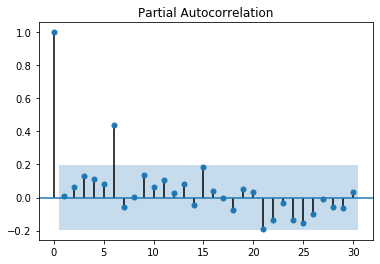

In [29]:
plot_pacf(squared_data, lags=30)
pyplot.show()

#### lags

Perhaps  15 lags

For the sake of this work, i will not split the data.

```python
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
```

## ARCH Model

Developing an ARCH model involves three steps:

1. Define the model.
2. Fit the model.
3. Make a forecast.

A model can be defined by calling the `arch_model()` function. We can specify a model for the mean of the series: in this case `mean=’Zero’` is an appropriate model. We can then specify the model for the variance: in this case `vol=’ARCH’`. We can also specify the lag parameter for the ARCH model: in this case p=15.

Note, in the arch library, the names of p and q parameters for ARCH/GARCH have been reversed.

The model can be fit on the data by calling the fit() function. There are many options on this function, although the defaults are good enough for getting started. This will return a fit model.

Finally, we can make a prediction by calling the forecast() function on the fit model. We can specify the horizon for the forecast.

In this case, we will predict the variance for the last 10 time steps of the dataset, and withhold them from the training of the model.



In [33]:
# define model
model = arch_model(data, mean='Zero', vol='ARCH', p=15)
# fit model
model_fit = model.fit()

print(model_fit)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/arch/univariate/base.py:259: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.3185. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(data_scale_warning.format(orig_scale, rescale),


Iteration:      1,   Func. Count:     18,   Neg. LLF: 54.89981856127176
Iteration:      2,   Func. Count:     37,   Neg. LLF: 52.33804535385239
Iteration:      3,   Func. Count:     56,   Neg. LLF: 50.64698107425962
Iteration:      4,   Func. Count:     75,   Neg. LLF: 49.640861474131185
Iteration:      5,   Func. Count:     94,   Neg. LLF: 47.11568626443006
Iteration:      6,   Func. Count:    113,   Neg. LLF: 46.536270847753
Iteration:      7,   Func. Count:    132,   Neg. LLF: 45.698145675113466
Iteration:      8,   Func. Count:    151,   Neg. LLF: 43.95101399434942
Iteration:      9,   Func. Count:    170,   Neg. LLF: 43.53233020990003
Iteration:     10,   Func. Count:    188,   Neg. LLF: 42.93809656021191
Iteration:     11,   Func. Count:    207,   Neg. LLF: 42.302429837011736
Iteration:     12,   Func. Count:    226,   Neg. LLF: 41.42650935907625
Iteration:     13,   Func. Count:    245,   Neg. LLF: 41.18642814286202
Iteration:     14,   Func. Count:    264,   Neg. LLF: 40.981057

In [37]:
n_test = 10
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

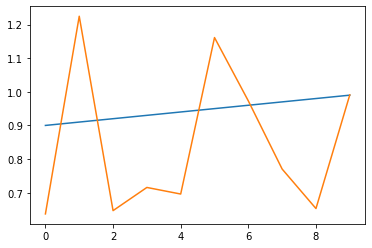

In [42]:
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

## GARCH Model

We can fit a GARCH model just as easily using the arch library.

The `arch_model()` function can specify a GARCH instead of ARCH model `vol=’GARCH’` as well as the lag parameters for both.

In [44]:
# define model
model = arch_model(data, mean='Zero', vol='GARCH', p=15, q=15)
# fit model
model_fit = model.fit()
model_fit

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/arch/univariate/base.py:259: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.3185. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(data_scale_warning.format(orig_scale, rescale),


Iteration:      1,   Func. Count:     33,   Neg. LLF: 63.63502602412685
Iteration:      2,   Func. Count:     71,   Neg. LLF: 63.453696341712146
Iteration:      3,   Func. Count:    105,   Neg. LLF: 61.038345263571
Iteration:      4,   Func. Count:    139,   Neg. LLF: 55.572423570555934
Iteration:      5,   Func. Count:    173,   Neg. LLF: 51.82525023627319
Iteration:      6,   Func. Count:    207,   Neg. LLF: 50.28467934728148
Iteration:      7,   Func. Count:    241,   Neg. LLF: 49.031361354755745
Iteration:      8,   Func. Count:    274,   Neg. LLF: 44.39011750847933
Iteration:      9,   Func. Count:    309,   Neg. LLF: 42.588831687909234
Iteration:     10,   Func. Count:    343,   Neg. LLF: 42.079732171380044
Iteration:     11,   Func. Count:    377,   Neg. LLF: 41.65229068710599
Iteration:     12,   Func. Count:    410,   Neg. LLF: 41.39011144304154
Iteration:     13,   Func. Count:    444,   Neg. LLF: 41.15030992869938
Iteration:     14,   Func. Count:    478,   Neg. LLF: 40.9877

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.010
Vol Model:                      GARCH   Log-Likelihood:               -40.8063
Distribution:                  Normal   AIC:                           143.613
Method:            Maximum Likelihood   BIC:                           224.373
                                        No. Observations:                  100
Date:                Thu, Nov 07 2019   Df Residuals:                       69
Time:                        15:07:57   Df Model:                           31
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.9845e-03  2.475e-02      0.161      0.872 

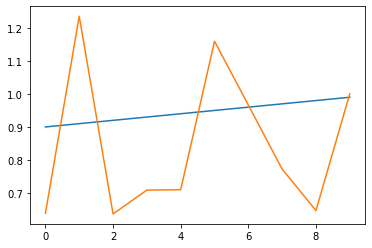

In [45]:
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

[arch/garch](https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/)